# 髭剃りにむけてのデータ分析

## データの取得
トランザクションデータは二日分を取得

```
wget -o LOG https://public.bybit.com/trading/BTCUSD/BTCUSD2021-05-14.csv.gz
wget -o LOG https://public.bybit.com/trading/BTCUSD/BTCUSD2021-05-15.csv.gz
```

Liquidationデータは、APIから取得（直近しかとれない）


```
./venv/bin/python liquid/bbliquid.py > ./DATA/liquid.csv
```　　

# 仮説1
　精算されたところが髭になっているのではないか？

In [338]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt



In [339]:
EXEC_DATA='../DATA/BTCUSD2021-05-14.csv.gz'
exec_df = pd.read_csv(EXEC_DATA)

exec_df['timestamp'] = pd.to_datetime(exec_df['timestamp']*1_000_000_000)

exec_df

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2021-05-14 23:59:59.468483840,BTCUSD,Sell,677,49909.0,ZeroMinusTick,dec4e356-236d-5954-9d0a-0480ddda59f1,1356468.0,677,0.013565
1,2021-05-14 23:59:58.423747072,BTCUSD,Sell,336747,49909.0,ZeroMinusTick,477e9f54-b70a-56db-ba48-7658c9e2015c,674721994.0,336747,6.747220
2,2021-05-14 23:59:58.423747072,BTCUSD,Sell,74864,49909.0,ZeroMinusTick,608d522e-c631-54a8-9e39-5fc813a2fcbe,150001001.0,74864,1.500010
3,2021-05-14 23:59:58.423747072,BTCUSD,Sell,160,49909.0,ZeroMinusTick,aa865f5b-b57e-5b60-915d-dddd14994387,320583.0,160,0.003206
4,2021-05-14 23:59:58.423747072,BTCUSD,Sell,78046,49909.0,ZeroMinusTick,c0f873fd-b2a9-5e22-806d-3af648d2258f,156376605.0,78046,1.563766
...,...,...,...,...,...,...,...,...,...,...
745897,2021-05-14 00:00:02.033566976,BTCUSD,Sell,31414,49708.5,ZeroMinusTick,95bc7edd-080f-5ac2-95ef-593b818606d0,63196435.0,31414,0.631964
745898,2021-05-14 00:00:02.033566976,BTCUSD,Sell,15652,49708.5,ZeroMinusTick,cdb8212c-f862-5083-98ef-7d54710c5f92,31487572.0,15652,0.314876
745899,2021-05-14 00:00:01.632832000,BTCUSD,Sell,857,49708.5,ZeroMinusTick,64f9d2a0-c092-5ce1-8d6a-e03d0684e190,1724051.0,857,0.017241
745900,2021-05-14 00:00:00.978902016,BTCUSD,Sell,4500,49708.5,ZeroMinusTick,b1dc4e2f-daab-5e52-84fb-28c348d7da53,9052777.0,4500,0.090528


In [340]:
LIQ_DATA='../DATA/liquid.csv'
liquid_df = pd.read_csv(LIQ_DATA)
liquid_df['timestamp'] = pd.to_datetime(liquid_df['timestamp']*1_000_000_000)

liquid_df.describe()


,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
count,1.000000e+03,1000.000000,0.0,0.0,0.0,0.0,0.0
mean,1.806700e+04,49601.834000,NaN,NaN,NaN,NaN,NaN
std,6.694696e+04,455.014807,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,48843.000000,NaN,NaN,NaN,NaN,NaN
25%,2.925000e+02,49284.500000,NaN,NaN,NaN,NaN,NaN
50%,1.536000e+03,49552.250000,NaN,NaN,NaN,NaN,NaN
75%,8.059000e+03,49838.000000,NaN,NaN,NaN,NaN,NaN
max,1.097674e+06,50955.000000,NaN,NaN,NaN,NaN,NaN


ログの中のBuy, Sellは、Buy＝Buyポジションの精算＝Sell実行、Sell=Sellポジションの精算＝Buy実行という意味のように見える。

In [341]:
sell_liq_df = liquid_df[liquid_df["side"].str.contains('Sell')]
sell_liq_df.describe()

,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
count,143.000000,143.000000,0.0,0.0,0.0,0.0,0.0
mean,12694.629371,50388.178322,NaN,NaN,NaN,NaN,NaN
std,62101.590270,335.200489,NaN,NaN,NaN,NaN,NaN
min,1.000000,49621.000000,NaN,NaN,NaN,NaN,NaN
25%,98.500000,50148.500000,NaN,NaN,NaN,NaN,NaN
50%,1289.000000,50407.500000,NaN,NaN,NaN,NaN,NaN
75%,5000.000000,50581.000000,NaN,NaN,NaN,NaN,NaN
max,650000.000000,50955.000000,NaN,NaN,NaN,NaN,NaN


In [342]:
buy_liq_df = liquid_df[liquid_df["side"].str.contains('Buy')]
buy_liq_df.describe()

,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
count,8.570000e+02,857.000000,0.0,0.0,0.0,0.0,0.0
mean,1.896344e+04,49470.623687,NaN,NaN,NaN,NaN,NaN
std,6.771434e+04,320.083083,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,48843.000000,NaN,NaN,NaN,NaN,NaN
25%,3.240000e+02,49227.000000,NaN,NaN,NaN,NaN,NaN
50%,1.560000e+03,49485.000000,NaN,NaN,NaN,NaN,NaN
75%,9.216000e+03,49744.500000,NaN,NaN,NaN,NaN,NaN
max,1.097674e+06,50231.500000,NaN,NaN,NaN,NaN,NaN


In [343]:
print(liquid_df["side"])

0       Buy 
1       Buy 
2       Buy 
3       Buy 
4       Buy 
       ...  
995     Buy 
996     Buy 
997     Buy 
998     Buy 
999     Buy 
Name: side, Length: 1000, dtype: object


約定データ、精算データともに一部しか手元になかったので、両方のデータが揃うタイムフレームに揃える。

In [344]:
liquid_start_time = liquid_df.iloc[0]['timestamp']
exec_df = exec_df[liquid_start_time < exec_df['timestamp']]

exec_end_time = exec_df['timestamp'].max()

sell_liq_df = sell_liq_df [sell_liq_df['timestamp'] <= exec_end_time]
buy_liq_df = buy_liq_df [buy_liq_df['timestamp'] <= exec_end_time]

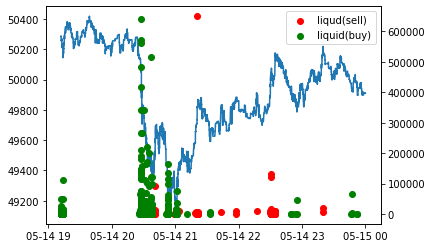

In [345]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x1 = exec_df['timestamp']
exec_price = exec_df['price']

plt.plot(x1, exec_price, label="exec")


ax2 = ax1.twinx()

x2= sell_liq_df['timestamp']
y2= sell_liq_df['size']

x3= buy_liq_df['timestamp']
y3= buy_liq_df['size']

plt.scatter(x2, y2, label='liqud(sell)', c='red')
plt.scatter(x3, y3, label='liquid(buy)', c='green')

ax2.legend(loc='upper right')

plt.show()

5月14日　20:30ごろに大きな変化があったところを拡大する。

In [346]:
date_from = dt.datetime(2021, 5, 14, 20, 20)
date_end = dt.datetime(2021, 5, 14, 22, 30)

exec_df = exec_df[(date_from < exec_df['timestamp']) & (exec_df['timestamp'] < date_end)]

sell_liq_df = sell_liq_df [(date_from < sell_liq_df['timestamp']) & (sell_liq_df['timestamp'] <= date_end)]
buy_liq_df = buy_liq_df [((date_from < buy_liq_df['timestamp']) & (buy_liq_df['timestamp'] <= date_end))]



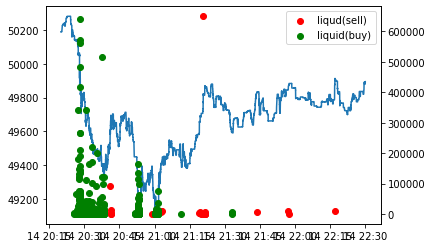

In [347]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x1 = exec_df['timestamp']
exec_price = exec_df['price']

plt.plot(x1, exec_price, label="exec")


ax2 = ax1.twinx()

x2= sell_liq_df['timestamp']
y2= sell_liq_df['size']

x3= buy_liq_df['timestamp']
y3= buy_liq_df['size']

plt.scatter(x2, y2, label='liqud(sell)', c='red')
plt.scatter(x3, y3, label='liquid(buy)', c='green')

ax2.legend(loc='upper right')

plt.show()


仮説１の結果：精算が入ったから価格が変化したのか、価格が変化したから精算がはいったかの因果関係は不明だが、関連はありそう。

## Next Step
仮説２：変化率の大きいところが底になっているのではないか？

仮説１と同一タイムフレームで、変化率を確認する。

In [348]:

exec_df.index = pd.DatetimeIndex(exec_df['timestamp'])
#exec_df.set_index('timestamp')

min_price=exec_df['price'].resample("min").ohlc()

min_price['change'] = min_price['close'].pct_change()

min_price


,open,high,low,close,change
timestamp,,,,,
2021-05-14 20:20:00,50188.5,50235.5,50188.0,50235.0,NaN
2021-05-14 20:21:00,50235.0,50246.0,50222.0,50246.0,0.000219
2021-05-14 20:22:00,50245.5,50281.0,50245.5,50280.5,0.000687
2021-05-14 20:23:00,50281.0,50281.0,50280.5,50281.0,0.000010
2021-05-14 20:24:00,50281.0,50281.0,50159.0,50199.5,-0.001621
...,...,...,...,...,...
2021-05-14 22:25:00,49792.0,49813.0,49792.0,49800.5,0.000161
2021-05-14 22:26:00,49800.5,49800.5,49775.0,49788.5,-0.000241
2021-05-14 22:27:00,49788.0,49836.5,49788.0,49836.5,0.000964


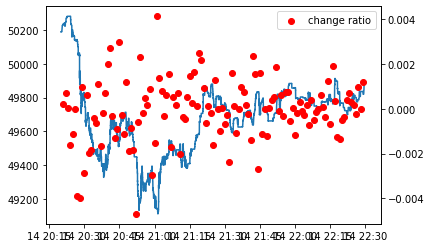

In [349]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x1 = exec_df.index
exec_price = exec_df['price']

plt.plot(x1, exec_price, label="exec")


ax2 = ax1.twinx()

#x2= min_price['timestamp']
x2= min_price.index
y2= min_price['change']

plt.scatter(x2, y2, label='change ratio', c='red')

ax2.legend(loc='upper right')

plt.show()

関係があるような、ないような。

In [350]:
```
#以下未完

big_change = min_price[0.01 < min_price['change']]

fig = plt.figure()
ax1 = fig.add_subplot(111)

x1 = exec_df.index
exec_price = exec_df['price']

plt.plot(x1, exec_price, label="exec")

ax2 = ax1.twinx()


x2= big_change.index
y2= big_change['change']

plt.scatter(x2, y2, label='change ratio', c='red')

ax2.legend(loc='upper right')

plt.show()
```










SyntaxError: invalid syntax (<ipython-input-350-1cea24e5eeb0>, line 1)